# Notes for Wednesday, April 4th, 2018

### Bayu Wilson


In [2]:
from utils import *

# Polynomial interpolation

[Neville's Algorithm](https://en.wikipedia.org/wiki/Neville%27s_algorithm)

In mathematics, Neville's algorithm is an algorithm used for polynomial interpolation that was derived by the mathematician Eric Harold Neville. Given n + 1 points, there is a unique polynomial of degree ≤ n which goes through the given points. Neville's algorithm evaluates this polynomial.

[scipy.interpolate.lagrange()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html)

Given two 1-D arrays x and w, returns the Lagrange interpolating polynomial through the points (x, w).
Warning: This implementation is numerically unstable. Do not expect to be able to use more than about 20 points even if they are chosen optimally.


(i) $$ P_{01} = \frac{(x-x_1)P_0+(x_0-x)P_1}{(x_0-x_1)}$$

(ii) $$ P_{12} = \frac{(x-x_2)P_1+(x_1-x)P_2}{(x_1-x_2)}$$

Interpolite the lines in i & ii to get iii and iv

(iii) $$ P_{012} = \frac{(x-x_2)P_{01}+(x_0-x)P_{12}}{(x_0-x_2)}$$

(iv) $$ P_{123} = \frac{(x-x_3)P_{12}+(x_1-x)P_{23}}{(x_1-x_2)}$$

Interpolate the previous interpolations these to get cubic?: 

(v) $$ P_{0123} = \frac{(x-x_3)P_{012}+(x_0-x)P_{123}}{(x_0-x_3)}$$

But also,

$$ P_{01}-P_0 = C_{1,0} = \frac{(x_0-x)(P_1-P_0)}{(x_0-x_1)}$$

$$ P_{01}-P_1 = D_{1,0} = \frac{(x-x_1)(P_0-P_1)}{(x_0-x_1)}$$

In [19]:
def neville(datax, datay, x):
    """
    Finds an interpolated value using Neville's algorithm.
    Input
      datax: input x's in a list of size n
      datay: input y's in a list of size n
      x: the x value used for interpolation
    Output
      p[0]: the polynomial of degree n
    """
    n = len(datax)
    p = n*[0]
    for k in range(n):
        for i in range(n-k):
            if k == 0:
                p[i] = datay[i]
            else:
                p[i] = ((x-datax[i+k])*p[i]+ \
                        (datax[i]-x)*p[i+1])/ \
                        (datax[i]-datax[i+k])
    return p[0]

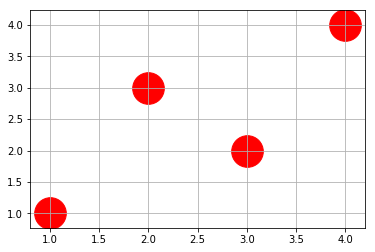

In [9]:
x,y = np.array([1,2,3,4]),np.array([1,3,2,4])
plt.scatter(x,y, s=1000,color = 'red')
plt.grid()
plt.show()

# Summary

Apparently linear interpolation is pretty simple. High accuracy very quickly. Though it can be unstable if function is not smooth.

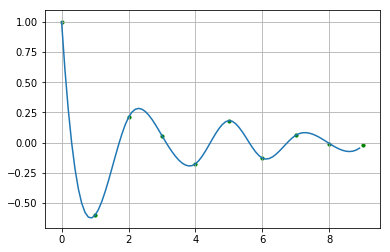

In [77]:
from scipy import interpolate
x = np.arange(0, 10)
y = np.exp(-x/3)*np.cos(x*10)
f = interpolate.interp1d(x, y,'cubic')#interpolate.lagrange(x,y)#interpolate.interp1d(x, y,'cubic')
xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)
plt.grid()
plt.plot(xnew,ynew)
plt.scatter(x,y,s=10, color = 'green')
plt.show();

# Weights by radius

### $ f(\vec{x})  = \sum_{nearest \space neighbors} f(\vec{x}_i)W\left(\left|\vec{x}-\vec{x}_i\right|\right)$


NGP - Nearest Grid Point

CIC - cloud in cell

This is useful in Smooth Particle Hydrodynamics